# Data driven Proposal to maximize profit of next market campaign
Name: Guilherme Coelho Minervino
Live in: Brasília/DF
Github: http://github.com/guico3lho
Linkedin: https://www.linkedin.com/in/guilherme-coelho-2258751a2/

## 1. Packages and Functions

### Import packages

In [61]:


import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import datetime
import numpy as np

### Functions

## 2. Preparing data

### Importing dataset

In [62]:
# import dataset from github
df = pd.read_csv('https://raw.githubusercontent.com/ifood/ifood-data-business-analyst-test/master/ml_project1_data.csv',
                 sep=',')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [63]:
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


Notes:
Shape (2240, 29)
Num_Columns_Numerical = 27
Num_Columns_Categorical = 2

###  Preprocessing

Due to the fact that 24 rows NULL values on Income column, we have two options: delete these rows or put the median of the values of all rows to these values. The solution with the best performance was:

Besides that, while reading the case, was not clear if 2n Cycle refeers high school or a pos graduation. So, a analysis of Income for each category will be made
Reference of 2nCycle pos graduation: https://www.unibo.it/en/teaching/enrolment-transfer-and-final-examination/the-university-system/what-is-a-second-cycle-degree-programme

In [64]:
# df = df.dropna()
df['Income'].fillna(df['Income'].median(), inplace=True)

df.groupby('Education')['Income'].mean().sort_values(ascending=True)

Education
Basic         20306.259259
2n Cycle      47688.583744
Graduation    52707.305679
Master        52896.777027
PhD           56096.303498
Name: Income, dtype: float64

Notes:
Based on the results, 2n Cycle was the second lowest income, so it can be presumed that 2n Cycle corresponds to High school, not a pos-graduation
That information will be further used to encode these categories to numerical (OrdinalEncoding)

There are two columns of type categorical and one column of type date
Lets see how many categories there are on the categorical ones

In [65]:
df_pp = df.copy()
display(df_pp['Education'].value_counts())
display(df_pp['Marital_Status'].value_counts())

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


With the goal to perform better exploratory analysis and predictions, it is necessary to convert columns Dt_customer (Date string), Education (Categorical ordinal), Marital_Status (Categorical nominal) to numeric representation


In [66]:
from sklearn.preprocessing import OrdinalEncoder


# Categorizando coluna Education seguindo uma ordem de hierarquia crescente (Basic (0) -> PhD (4))
categories = [['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']]
ordinalEncoder = OrdinalEncoder(categories=categories)
df_pp['Education_Cat'] = ordinalEncoder.fit_transform(df_pp['Education'].values.reshape(-1, 1))
df_pp['Education_Cat'] = df_pp['Education_Cat'].astype(int)


Notes:
The OrdinalEncoder was used because the Education column has ordinal categories (categories has a hierarchy between them)
Basic, 2n Cycle, Graduation, Master, PhD will recieve a value (weight) of 0, 1, 2, 3, 4, respectively

In [67]:
# Categorizando coluna Marital Status utilizando get_dummies, já que a ordem das categorias não é importante
df_pp = pd.get_dummies(df_pp, columns=['Marital_Status'], prefix=['Marital_Type'])
df_pp['Marital_Status'] = df['Marital_Status']


Notes:
get_dummies was used because Marital_Status does not have hierarchy between them (nominal categories). Each category will recieve its own column

Transforming date column to number

In [68]:
df_pp['Dt_Customer_Number'] = df_pp['Dt_Customer'].apply(lambda x: int(round(datetime.datetime.strptime(x, '%Y-%m-%d').timestamp())))

In [69]:
# Shift response column to the end of df
df_columns = [col for col in df_pp.columns if col != 'Response']
df_columns.insert(len(df_pp), 'Response')
df_pp = df_pp[df_columns]

df after all pre processings:

In [70]:
df_pp

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Marital_Type_Alone,Marital_Type_Divorced,Marital_Type_Married,Marital_Type_Single,Marital_Type_Together,Marital_Type_Widow,Marital_Type_YOLO,Marital_Status,Dt_Customer_Number,Response
0,5524,1957,Graduation,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,1,0,0,0,Single,1346727600,1
1,2174,1954,Graduation,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,1,0,0,0,Single,1394247600,0
2,4141,1965,Graduation,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,1,0,0,Together,1377054000,0
3,6182,1984,Graduation,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,1,0,0,Together,1392001200,0
4,5324,1981,PhD,58293.0,1,0,2014-01-19,94,173,43,...,0,0,1,0,0,0,0,Married,1390100400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,61223.0,0,1,2013-06-13,46,709,43,...,0,0,1,0,0,0,0,Married,1371092400,0
2236,4001,1946,PhD,64014.0,2,1,2014-06-10,56,406,0,...,0,0,0,0,1,0,0,Together,1402369200,0
2237,7270,1981,Graduation,56981.0,0,0,2014-01-25,91,908,48,...,0,1,0,0,0,0,0,Divorced,1390618800,0
2238,8235,1956,Master,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,1,0,0,Together,1390532400,0


Notes:
10 columns were added due to the numericalization of columns Education, Marital_Status and Dt_Customer

## 3. Exploratory Analysis

### 3.1. Analyzing 10 samples (5 with target = 1 and 5 with target = 0)
Objective: find nice features and bad features and insights about future analysis

In [71]:
samples = df_pp.sort_values(by=['Response'], ascending=False).groupby('Response').head(5)
samples

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Marital_Type_Alone,Marital_Type_Divorced,Marital_Type_Married,Marital_Type_Single,Marital_Type_Together,Marital_Type_Widow,Marital_Type_YOLO,Marital_Status,Dt_Customer_Number,Response
0,5524,1957,Graduation,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,1,0,0,0,Single,1346727600,1
1084,6072,1970,Master,75345.0,0,0,2013-02-02,16,918,57,...,0,0,0,1,0,0,0,Single,1359774000,1
1000,10473,1956,PhD,78028.0,0,1,2012-09-10,38,158,19,...,0,0,0,0,0,1,0,Widow,1347246000,1
1001,7962,1987,PhD,95169.0,0,0,2013-10-09,1,1285,21,...,0,0,0,1,0,0,0,Single,1381287600,1
1002,9984,1981,2n Cycle,56337.0,1,1,2013-03-27,25,349,16,...,0,0,1,0,0,0,0,Married,1364353200,1
106,7533,1964,Graduation,49096.0,1,1,2013-09-24,15,144,1,...,0,0,1,0,0,0,0,Married,1379991600,0
105,8373,1979,Basic,24594.0,1,0,2013-12-10,94,1,3,...,0,0,0,0,1,0,0,Together,1386644400,0
1587,2471,1965,Graduation,61482.0,0,0,2014-06-27,39,48,58,...,0,0,1,0,0,0,0,Married,1403838000,0
1718,10640,1974,Graduation,44392.0,1,1,2013-09-05,71,87,5,...,0,0,0,0,1,0,0,Together,1378350000,0
1588,5892,1980,Graduation,34968.0,1,0,2013-04-10,11,158,6,...,0,0,1,0,0,0,0,Married,1365562800,0


Notes (Initial hypotheses):
- Columns correlated to Response: MntFruits,Meat,Fish,Hold; NumWebPurchases,CatalogPurchases; Education; Marital_Status

### 3.2 Lets see the statistics about data

In [72]:
df_pp.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Type_Absurd,Marital_Type_Alone,Marital_Type_Divorced,Marital_Type_Married,Marital_Type_Single,Marital_Type_Together,Marital_Type_Widow,Marital_Type_YOLO,Dt_Customer_Number,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.000893,0.001339,0.103571,0.385714,0.214286,0.258929,0.034375,0.000893,1.373461e+09,0.149107
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.029874,0.036580,0.304772,0.486872,0.410418,0.438144,0.182231,0.029874,1.746339e+07,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.343617e+09,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.358305e+09,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.373296e+09,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.388394e+09,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.404011e+09,1.000000


Notes:
Study about describe() func


### 3.3 Lets see the balancement of the dataset

In [73]:
df_pp['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

Notes:
- The dataset is imbalanced
- Percentage of customers that responded to campaign: 15%
- Percentage of customers that not responded to campaign: 85%
- Therefore, can be presumed that future machine learning models will be better at predicting a customer that WILL NOT RESPOND to a campaing (negative customer - 0) than predicting a customer that WILL RESPOND (positive customer - 1).

### 3.4 Lets see the mean of each column based on target label (Response)

In [74]:
df_3_4 = df_pp.groupby('Response').mean()
df_3_4

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Cat,Marital_Type_Absurd,Marital_Type_Alone,Marital_Type_Divorced,Marital_Type_Married,Marital_Type_Single,Marital_Type_Together,Marital_Type_Widow,Marital_Type_YOLO,Dt_Customer_Number
Response,,,,,,,,,,,,,,,,,,,,,
0,5622.009444,1968.698846,50845.677597,0.462225,0.541448,51.514690,269.104407,24.216684,144.624344,34.980063,...,2.418678,0.000525,0.001049,0.096537,0.401889,0.196222,0.272823,0.030430,0.000525,1.374883e+09
1,5421.820359,1969.416168,60183.244012,0.341317,0.305389,35.383234,502.703593,38.203593,294.353293,52.050898,...,2.697605,0.002994,0.002994,0.143713,0.293413,0.317365,0.179641,0.056886,0.002994,1.365350e+09


OBS:
- Labels Education, Marital_Status did not appear due to categorical nature
- Columns Z_CostContact and Z_Revenue did not appear due to constant nature for all samples

Notes:
- Year_Birth, **Income**, **Mnt.***,  Num.* - NumWebVisitsMonth, **AcceptedCmp[1-5]**, Education was higher for **Response = 1**
- **Kidhome**, **Teenhome**, **Recency**, NumWebVisitsMonth, Complain was higher for **Response = 0**
- Education was better for positive customers than negative
- OBS: for the Num.* columns, NumWebPurchases, NumCatalogPurchases, NumStorePurchases have the most significant diff (>0.15)

Notes:
Considering the average results:
- Positive customers have 10k higher income than negative customers
- Negative customers have more Kids and Teens than positive customers
- Negative customers take longer time to do another purchase than positive customers
- Positive customers buy almost double quantity of Wines and Meat than negative customers
- Positive customers buy more Fruits, Fish, Sweet and Gold than negative customers
- Positive customers buys more using Catalog than negative customers
- Positive customers buy more on Web than negative customers, despite the number of WebVisits of each is very similar (Therefore, the chance of Positive customers buy a product on Web is higher than negative customers
- Considering all previous Campaigns, positive customers responded better than negative customers
- Was expected to Complain be higher on negative customers. But the data showed they have approximate values
- Education of positive customers is higher than negative
- Looking at Marital_status columns, can be inferred that the new gadget is more acceptable by single people (Single or Divorced)

## 4. Visualizations
Let's drop columns that does not give information


In [75]:
df_4 = df_pp.copy()
df_4 = df_4.drop(['ID', 'Z_CostContact', 'Z_Revenue', 'Education', 'Marital_Status'], axis=1)
df_4

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Type_Absurd,Marital_Type_Alone,Marital_Type_Divorced,Marital_Type_Married,Marital_Type_Single,Marital_Type_Together,Marital_Type_Widow,Marital_Type_YOLO,Dt_Customer_Number,Response
0,1957,58138.0,0,0,2012-09-04,58,635,88,546,172,...,0,0,0,0,1,0,0,0,1346727600,1
1,1954,46344.0,1,1,2014-03-08,38,11,1,6,2,...,0,0,0,0,1,0,0,0,1394247600,0
2,1965,71613.0,0,0,2013-08-21,26,426,49,127,111,...,0,0,0,0,0,1,0,0,1377054000,0
3,1984,26646.0,1,0,2014-02-10,26,11,4,20,10,...,0,0,0,0,0,1,0,0,1392001200,0
4,1981,58293.0,1,0,2014-01-19,94,173,43,118,46,...,0,0,0,1,0,0,0,0,1390100400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,2013-06-13,46,709,43,182,42,...,0,0,0,1,0,0,0,0,1371092400,0
2236,1946,64014.0,2,1,2014-06-10,56,406,0,30,0,...,0,0,0,0,0,1,0,0,1402369200,0
2237,1981,56981.0,0,0,2014-01-25,91,908,48,217,32,...,0,0,1,0,0,0,0,0,1390618800,0
2238,1956,69245.0,0,1,2014-01-24,8,428,30,214,80,...,0,0,0,0,0,1,0,0,1390532400,0


### 4.1 Univariate Plot

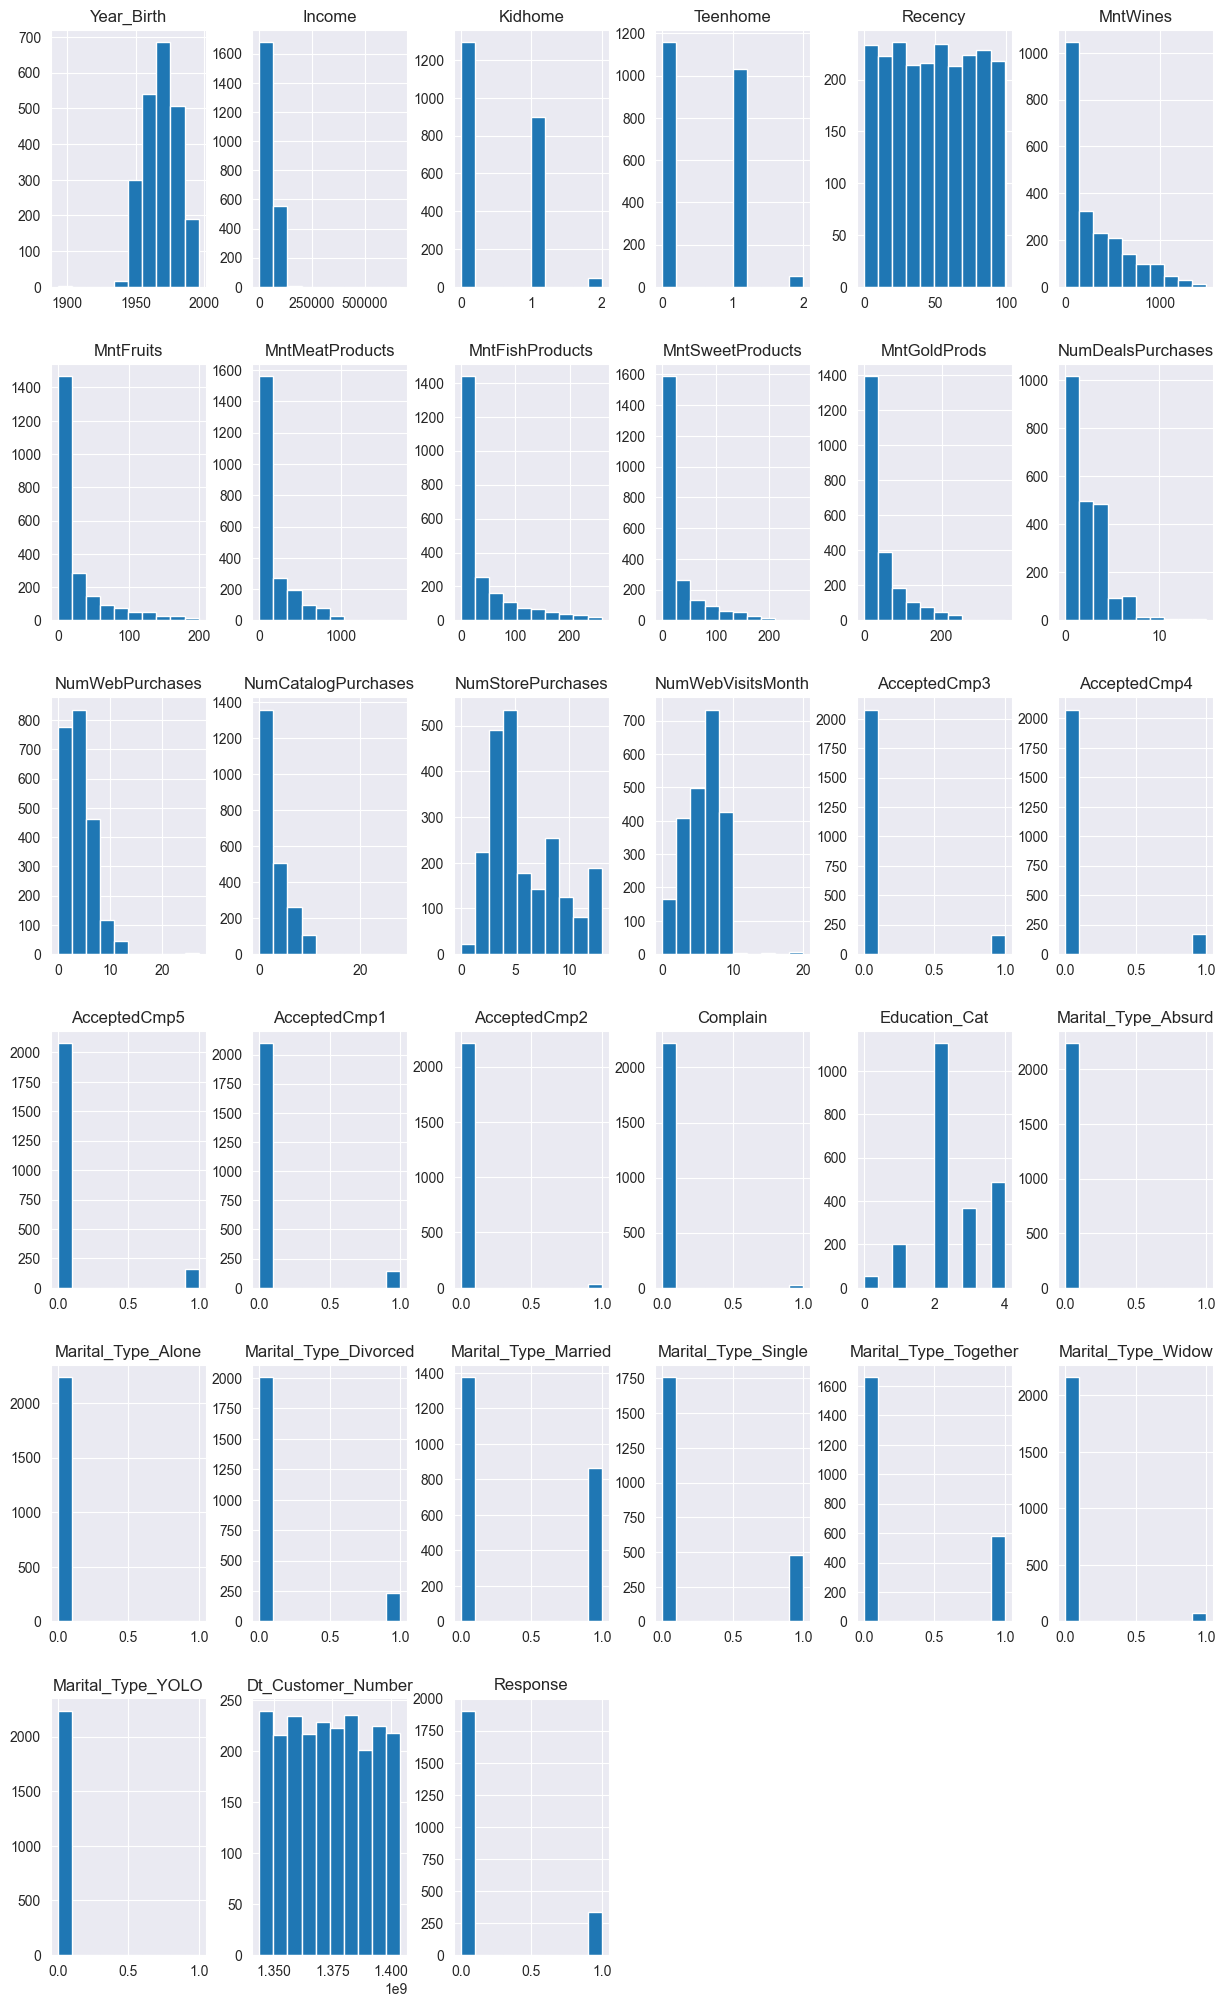

In [76]:
df_4.hist(figsize=(15, 25))
plt.show()

Notes:
To the best of my knowledge, was not found any new insight looking at the histograms above

### 4.2 Multivariate Plot


Notes:
- Year_Birth, **Income**, **MntWines**, **MntMeat**, **MntFish**, **MntSweet**, **MntGold**, **NumCatalog**, **NumWeb**, **AcceptedCmp[1-5]**, **Education**, **Alone**, **Divorced**, **Single**, **Widow**, **Absurd** was higher for **Response = 1**
- **Kidhome**, **Teenhome**, **Recency**, **Maried**, **Together** was higher for **Response = 0**
- OBS: for the Num.* columns, NumWebPurchases, NumCatalogPurchases, NumStorePurchases have the most significant diff (>0.15)

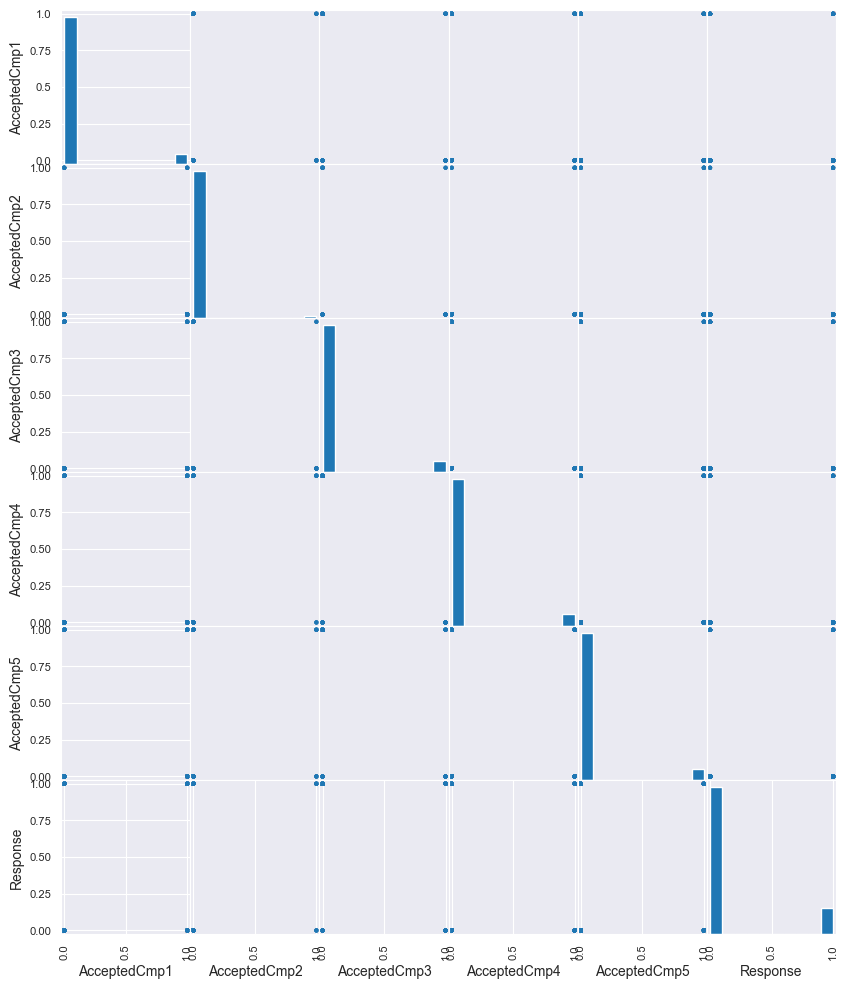

In [77]:

df_4_2 = df_4.copy()
df_4_2 = df_4_2.loc[:, ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]
scatter_matrix(df_4_2, figsize=(10, 12))
plt.show()

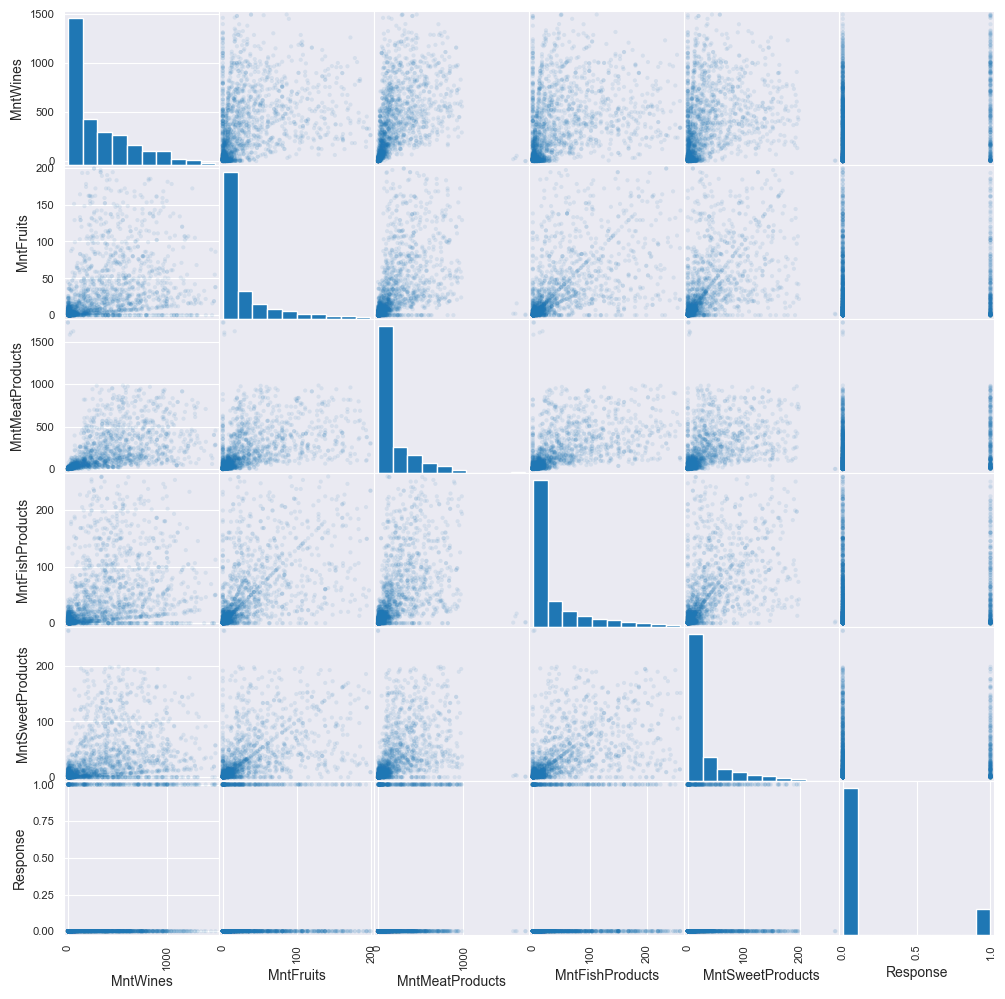

In [78]:

df_4_2 = df_4.copy()
df_4_2 = df_4_2.loc[:, ['MntWines', 'MntFruits',
                        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'Response']]
scatter_matrix(df_4_2, figsize=(12, 12),alpha=0.1)
plt.show()

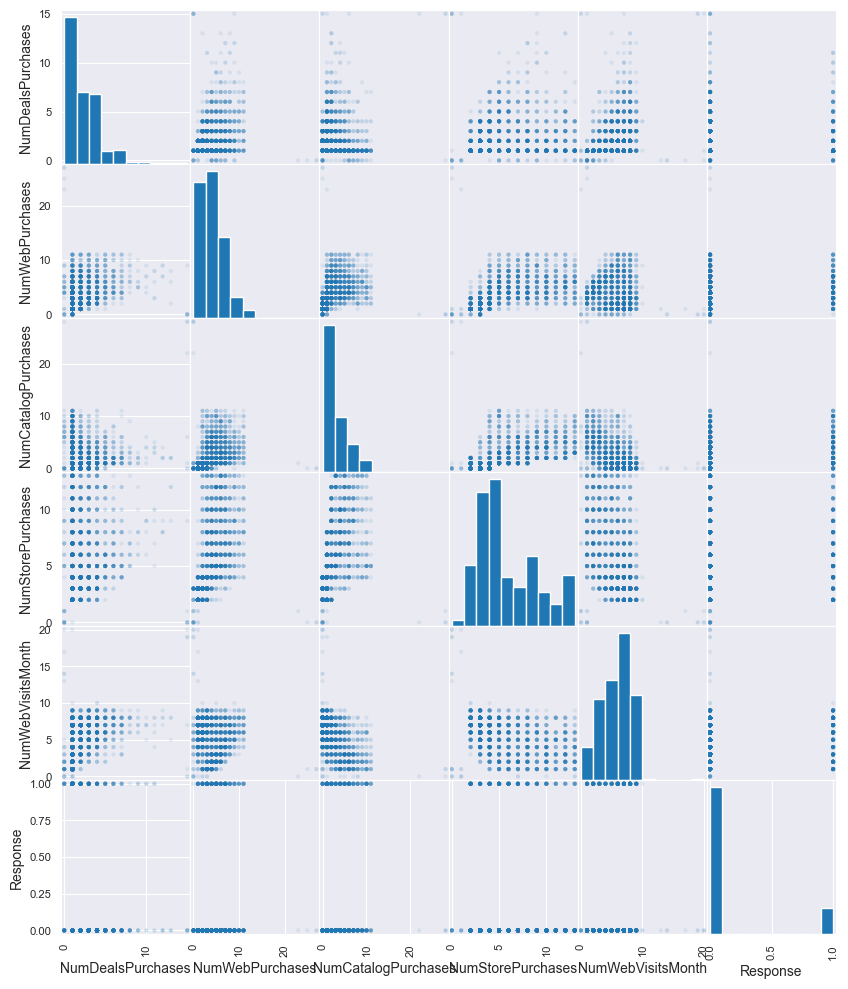

In [79]:

df_4_2 = df_4.copy()
df_4_2 = df_4_2.loc[:, ['NumDealsPurchases', 'NumWebPurchases',
                        'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Response']]
scatter_matrix(df_4_2, figsize=(10, 12),alpha=0.1)
plt.show()

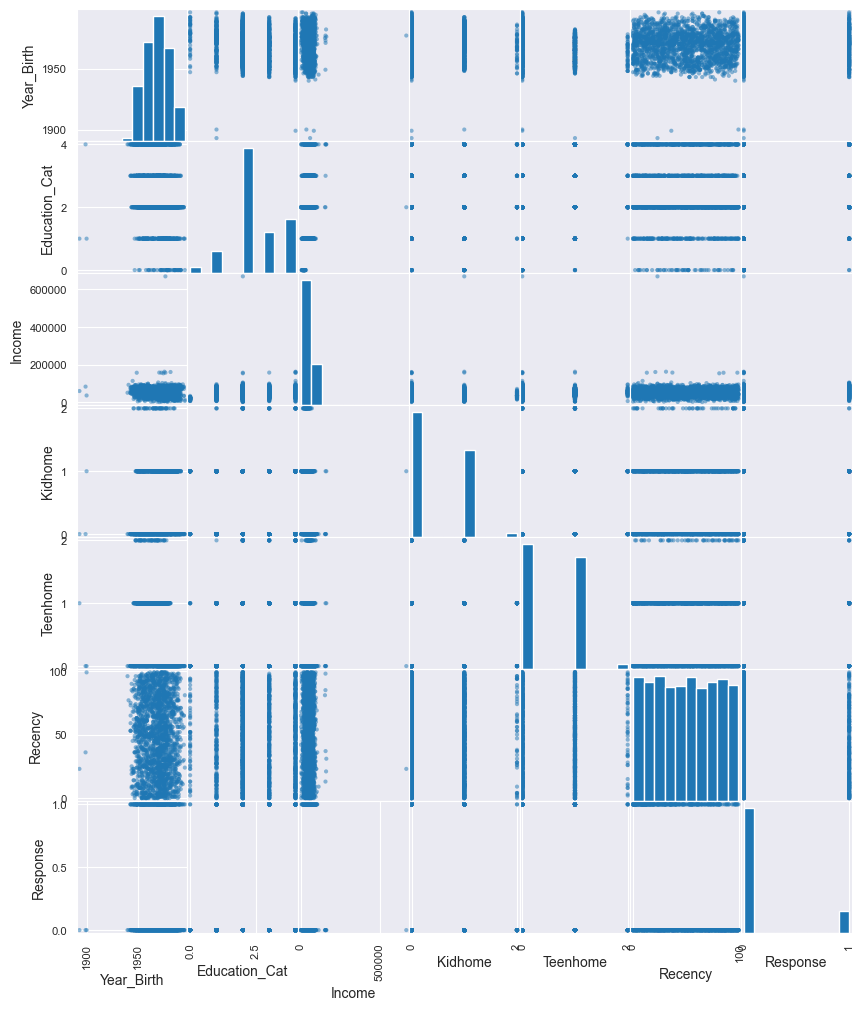

In [80]:

df_4_2 = df_4.copy()
df_4_2 = df_4_2.loc[:, ['Year_Birth', 'Education_Cat', 'Income', 'Kidhome',
                        'Teenhome', 'Dt_Customer', 'Recency', 'Response']]
scatter_matrix(df_4_2, figsize=(10, 12))
plt.show()

Notes:
- Can be said that Higher Wine and Meet, higher the chance that is a positive costumer
- Can be said that higher fish, higher fruits and wine
- Can be said that higher wine, higher meat and sweets
- Can be said that lower the store purchases, higher the chance that is a negative costumer

### 4.3 Confirming notes above using corr()

In [81]:
corr = df_pp.corr()
corr

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Type_Absurd,Marital_Type_Alone,Marital_Type_Divorced,Marital_Type_Married,Marital_Type_Single,Marital_Type_Together,Marital_Type_Widow,Marital_Type_YOLO,Dt_Customer_Number,Response
ID,1.000000,0.000028,0.012996,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,0.004230,-0.032310,-0.017289,0.010007,-0.016558,0.009563,0.021937,0.002029,0.000240,-0.021968
Year_Birth,0.000028,1.000000,-0.160899,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,0.015455,0.012819,-0.071774,0.051193,0.116978,-0.052258,-0.161370,0.010465,-0.022431,0.021325
Income,0.012996,-0.160899,1.000000,-0.425326,0.018965,-0.004061,0.576903,0.428791,0.577805,0.437564,...,0.024037,-0.012360,0.008096,-0.016327,-0.025773,0.023261,0.031486,-0.004545,0.018470,0.132867
Kidhome,0.002406,0.230176,-0.425326,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,-0.024669,0.037813,-0.019199,0.017403,0.019779,0.006373,-0.073760,-0.024669,0.053343,-0.080008
Teenhome,-0.002580,-0.352111,0.018965,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,-0.027798,0.010791,0.052613,0.007749,-0.095925,0.025038,0.045093,0.027112,-0.017465,-0.154446
Recency,-0.046524,-0.019871,-0.004061,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,0.004017,-0.023746,0.004434,-0.022757,0.007158,0.020363,0.000218,-0.047603,-0.024522,-0.198437
MntWines,-0.022878,-0.157773,0.576903,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,0.004581,-0.012979,0.021120,-0.010491,-0.024216,0.005077,0.036632,0.001605,-0.166264,0.247254
MntFruits,0.004600,-0.017917,0.428791,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,0.043752,-0.020539,0.009612,-0.011304,0.007002,-0.014155,0.032211,-0.017518,-0.066928,0.125289
MntMeatProducts,-0.004437,-0.030872,0.577805,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,0.019281,-0.022819,-0.025219,-0.022011,0.035079,0.003021,0.018675,-0.015492,-0.092713,0.236335
MntFishProducts,-0.024475,-0.041625,0.437564,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,0.091940,-0.020020,-0.015449,-0.031116,0.006609,0.015865,0.047894,-0.018350,-0.080769,0.111331


TODO:
1. Ver quais são as features mais correlacionadas ao Response
2. Ver quais features são mais correlacionadas as features que são correlacionadas ao Response

Notes:
Analyzing the correlation, a new feature was found relevant: Dt_Customer_Number

## 5. Customer segmentation

In [82]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [83]:
def log_alt(x):
    if np.log(x) < 0:
        return 0
    else:
        return np.log(x)

In [84]:
data = df_pp[["MntWines", "MntMeatProducts", "Response"]]

df_log = pd.DataFrame()
df_log['MntWines'] = data['MntWines'].apply(log_alt)
df_log['MntMeatProducts'] = data['MntMeatProducts'].apply(log_alt)
df_log['Response'] = data['Response']

std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)

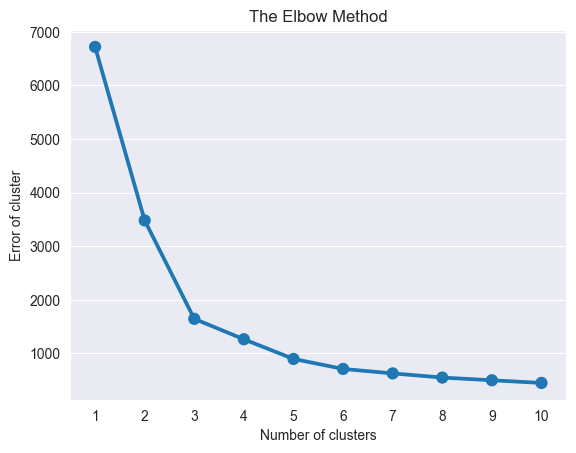

In [85]:

erros = []
for k in range(1,11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    erros.append(model.inertia_)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Error of cluster')
sns.pointplot(x=list(range(1,11)), y=erros)
plt.show()

In [86]:
model = KMeans(n_clusters=3, random_state=2)
model.fit(df_scaled)
data = data.assign(ClusterLabel = model.labels_)
data.groupby("ClusterLabel")[["MntWines", "MntMeatProducts", "Response"]].median()

,MntWines,MntMeatProducts,Response
ClusterLabel,,,
0,386.0,156.0,0.0
1,15.0,11.0,0.0
2,460.5,203.0,1.0


In [87]:
import plotly.express as px
fig = px.scatter_3d(
    data_frame=data,
    x="MntWines",
    y="MntMeatProducts",
    z="Response",
    title = "Relationship between MntWines, MntMeatProducts, Response",
    color="ClusterLabel",
    height=500
)
fig.show()

Notes:
Based on

## 6. Classification metodologies

### Packages

In [88]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


### Functions

In [89]:
def evaluateModels(X_train, y_train, models, n_splits):
    print(f"{n_splits}-Fold Cross validation")
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=2)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print(f"{name}: Mean Accuracy={cv_results.mean():.5f}, Standard Deviation={cv_results.std():.5f}")

In [90]:
class Models:
    def __init__(self, X_train, X_test , y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def logistic_regression(self):
        print("Logistic Regression")
        self.name = 'Logistic Regression'
        self.classifier = LogisticRegression(solver='liblinear', multi_class='ovr')
        self.classifier.fit(self.X_train, self.y_train)
        self.y_pred = self.classifier.predict(self.X_test)

    def svm(self):
        self.name = 'SVM'
        print("SVM")
        # self.classifier = SVC(C=1.0, kernel='linear', degree=3, gamma='auto',random_state=0)
        self.classifier = SVC(gamma='auto')

        self.classifier.fit(self.X_train, self.y_train)
        self.y_pred = self.classifier.predict(self.X_test)

    def k_neighbors(self, n_neighbors):
        self.name = 'K Neighbors'
        print("KNN, n_neighbors = {}".format(n_neighbors))
        # self.classifier = KNeighborsClassifier(n_neighbors=5, metric='cosine', p=2)
        self.classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric='euclidean')

        self.classifier.fit(self.X_train, self.y_train)
        self.y_pred = self.classifier.predict(self.X_test)

    def score(self, type='cr'):
        self.score1 = accuracy_score(self.y_test, self.y_pred)
        self.score2 = precision_score(self.y_test, self.y_pred)
        self.score3 = recall_score(self.y_test, self.y_pred)
        self.score4 = f1_score(self.y_test, self.y_pred)
        self.cm = confusion_matrix(self.y_test, self.y_pred)

        if (type == 'scores'):

            print("---- Scores ----")
            print("Accuracy score is: {}%".format(round(self.score1 * 100, 2)))
            print("Precision score is: {}".format(round(self.score2 * 100, 2)))
            print("Recall score is: {}".format(round(self.score3 * 100, 2)))
            print("F1 score is: {}".format(round(self.score4 * 100, 2)))
        elif (type == 'cr'):
            print("---- Classification Report ----")
            print(classification_report(self.y_test, self.y_pred))

        elif (type == 'cm'):
            print("---- Confusion Matrix ----")

            self.show_confusion_matrix()

    def show_confusion_matrix(self):
        print("Confusion Matrix")
        plt.figure(figsize=(5, 5))

        sns.heatmap(self.cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],
                    yticklabels=['Negative', 'Positive'])
        plt.xlabel('Predicted')
        plt.ylabel('Truth')
        plt.title('Confusion Matrix')
        plt.show()

### Metodology 1
- Use features more correlated with target Response for training

#### Preparing data for input to model

Get column names more correlated to Response (abs >= 0.1)

In [91]:
# get columns more correlated
df_more_corr = corr.loc[abs(corr['Response']) >= 0.09]
columns_more_corr = df_more_corr.index.tolist()
# create dataframe with these columns
df_m1 = df_pp[columns_more_corr]




In [92]:
# Split array into features and target label
m1_array = df_m1.values
X = m1_array[:, :-1]
y = m1_array[:, -1]

In [93]:
# normalize features
ss = MinMaxScaler()
X = ss.fit_transform(X)

Notes:
Was decided to use the MinMaxScaler normalization because the models had of 2% increase of accuracy in comparison to not using any kind of normalization

This normnaization maps each column to a range of 0 to 1, based on the max value of the columns and the minimum value of the column to decide the final value

In [94]:
# split into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=2)

#### Evaluating models

In [95]:
# evaluating models

models = []

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))

evaluateModels(X_train,y_train, models, 10)

10-Fold Cross validation
LR: Mean Accuracy=0.88839, Standard Deviation=0.01037
KNN: Mean Accuracy=0.87223, Standard Deviation=0.01671
CART: Mean Accuracy=0.84542, Standard Deviation=0.02033
SVM: Mean Accuracy=0.87723, Standard Deviation=0.01084


#### Predictions
- Now that the best models was evaluated, it is time to test it on unseen data

In [96]:
models = Models(X_train, X_test, y_train, y_test)
models.logistic_regression()
models.score()
models.cm

Logistic Regression
---- Classification Report ----
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       365
         1.0       0.84      0.39      0.53        83

    accuracy                           0.87       448
   macro avg       0.86      0.68      0.73       448
weighted avg       0.87      0.87      0.85       448



array([[359,   6],
       [ 51,  32]], dtype=int64)

Notes:
LR and SVM were the best models for StratifiedKfold and 0.8 of train_size, with 0.862 and 0.850 of accuracy, respectively

### Metodology 2
- Use all features for training

#### Preparing data for input to model

In [97]:
df_m2 = df_pp.copy()
df_m2.drop(columns=['Education', 'Marital_Status','Dt_Customer','Z_Revenue','Z_CostContact'], inplace=True)


In [98]:
m2_array = df_m2.values
X = m2_array[:, :-1]
y = m2_array[:, -1]

In [99]:
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
X = ss.fit_transform(X)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=2)

#### Evaluating models

In [101]:
models = []

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))

evaluateModels(X_train, y_train, models, 10)

10-Fold Cross validation
LR: Mean Accuracy=0.89396, Standard Deviation=0.00945
KNN: Mean Accuracy=0.87723, Standard Deviation=0.02272
CART: Mean Accuracy=0.83370, Standard Deviation=0.02104
SVM: Mean Accuracy=0.87501, Standard Deviation=0.01113


Notes:
LR was the best model using StratifiedKfold and 80/20 train_test_split, with 0,89107 of accuracy

Due to the fact that LR got the best results, it will be used for the final test: use the model for unseen data (test_split)

#### Predictions
- Now that the best models was evaluated, it is time to test it on unseen data


Logistic Regression
---- Classification Report ----
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       365
         1.0       0.83      0.42      0.56        83

    accuracy                           0.88       448
   macro avg       0.86      0.70      0.74       448
weighted avg       0.87      0.88      0.86       448

Confusion Matrix


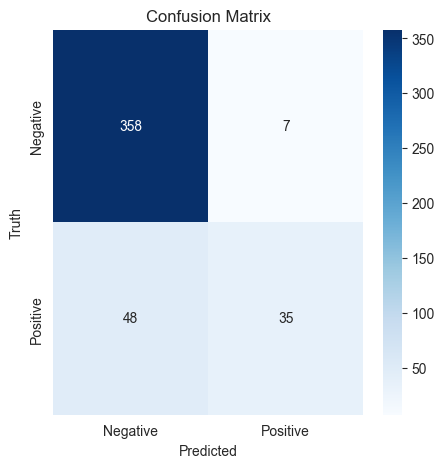

In [102]:
models = Models(X_train, X_test, y_train, y_test)
models.logistic_regression()
models.score()
models.show_confusion_matrix()

## 7. Conclusion

## 8. References
https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd
https://towardsdatascience.com/data-exploration-and-analysis-using-python-e564473d7607
https://medium.com/ml-research-lab/chapter-4-knowledge-from-the-data-and-data-exploration-analysis-99a734792733

Data Science Do Zero: Noções Fundamentais com Python, 2021 - Joel Grus